In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [2]:
# Reading and dropping duplicates aapl
aapl_historical_csv = Path('Resources/aapl_historical.csv')
aapl_historical = pd.read_csv(aapl_historical_csv, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
aapl_historical.drop_duplicates()
aapl_historical.isnull()
aapl_historical.dropna()

aapl = aapl_historical

In [3]:
# Reading and dropping duplicates algo
algo_returns_csv = Path('Resources/algo_returns.csv')
algo_returns = pd.read_csv(algo_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns.drop_duplicates()
algo_returns.isnull()
algo_returns.dropna()

algo = algo_returns

In [4]:
# Reading and dropping duplicates cost
cost_historical_csv = Path('Resources/cost_historical.csv')
cost_historical = pd.read_csv(cost_historical_csv, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
cost_historical.drop_duplicates()
cost_historical.isnull()
cost_historical.dropna()

cost = cost_historical

In [5]:
# Reading and dropping duplicates goog
goog_historical_csv = Path('Resources/goog_historical.csv')
goog_historical = pd.read_csv(goog_historical_csv, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
goog_historical.drop_duplicates()
goog_historical.isnull()
goog_historical.dropna()

goog = goog_historical

In [22]:
# Combine stock datasets of goog, aapl, and cost. Drop extra columns and rename columns.
stock_portfolio = pd.concat([goog, aapl, cost], axis='columns', join='inner')
stock_portfolio = stock_portfolio.drop(columns=['Symbol','Symbol','Symbol'])
stock_portfolio
columns = ['GOOG','AAPL','COST']
stock_portfolio.columns = columns
stock_portfolio

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62
...,...,...,...
2018-05-17,1078.59,186.99,199.60
2018-05-16,1081.77,188.18,198.71
2018-05-15,1079.23,186.44,195.48


<AxesSubplot:xlabel='Trade DATE'>

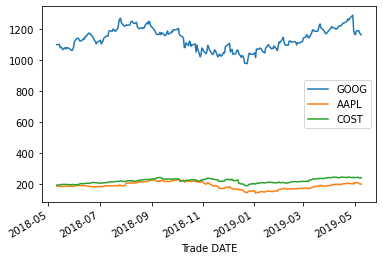

In [23]:
# Plotting the portfolio for visual performance
stock_portfolio.plot()

In [24]:
# Percent returns of stock portfolio
portfolio_returns = stock_portfolio.pct_change()
portfolio_returns.dropna(inplace=True)
portfolio_returns

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-08,0.003347,0.010861,-0.008749
2019-05-07,0.006714,-0.000197,-0.004806
2019-05-06,0.013023,0.027704,0.016862
2019-05-03,-0.003355,0.015685,0.001597
2019-05-02,-0.019226,-0.012279,-0.007890
...,...,...,...
2018-05-17,0.011469,0.003650,0.003217
2018-05-16,0.002948,0.006364,-0.004459
2018-05-15,-0.002348,-0.009246,-0.016255


<AxesSubplot:xlabel='Trade DATE'>

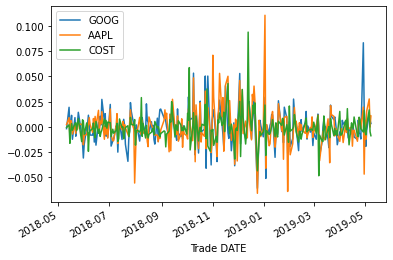

In [25]:
# Portfolio plot
portfolio_returns.plot()

In [26]:
# Reading and dropping dupplicates sp500 and changing Close to S&P500
sp500_historical_csv = Path('Resources/sp500_history.csv')
sp500_historical = pd.read_csv(sp500_historical_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
columns = ['S&P500']
sp500_historical.columns = columns
sp500_historical['S&P500'] = sp500_historical['S&P500'].str.replace('$','').astype(float)
sp500_historical

<ipython-input-26-2724794347d8>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_historical['S&P500'] = sp500_historical['S&P500'].str.replace('$','').astype(float)


,S&P500
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [27]:
# Changed dataset type from object to float
sp500_historical = sp500_historical.astype(float)
sp500_historical.dropna()

sp500 = sp500_historical
sp500.dropna(inplace=True)

<AxesSubplot:xlabel='Date'>

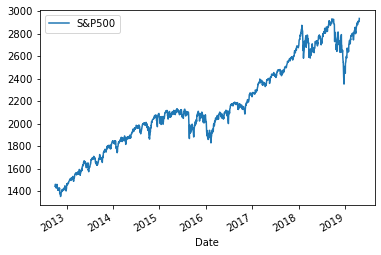

In [28]:
# Plotting the sp500
sp500.plot()

In [29]:
# Daily returns sp500
sp500_returns = sp500.pct_change()
sp500_returns.dropna(inplace=True)
sp500_returns.head()

,S&P500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


<AxesSubplot:xlabel='Date'>

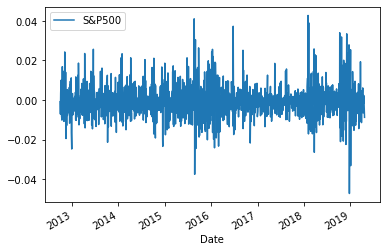

In [30]:
# SP500 plot
sp500_returns.plot()

<AxesSubplot:xlabel='Date'>

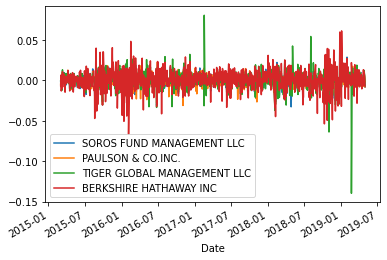

In [31]:
# Reading and dropping duplicates whale returns
whale_returns_csv = Path('Resources/whale_returns.csv')
whale_returns = pd.read_csv(whale_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_returns.drop_duplicates()
whale_returns.isnull()
whale_returns.dropna()

whales = whale_returns

whales.plot()

In [32]:
# Combine all returns
combined_returns = pd.concat([whales, sp500_returns, portfolio_returns], axis='columns', join='inner')
combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P500,GOOG,AAPL,COST
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,-0.000883,-0.001763,0.002339,-0.000613
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.006889,0.019431,0.009172,0.002046
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.004044,-0.002348,-0.009246,-0.016255
2018-05-16,0.008637,0.006244,0.005480,0.004310,0.000857,0.002948,0.006364,-0.004459
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,0.002639,0.011469,0.003650,0.003217
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.000509,-0.004914,-0.000100,0.004035
2019-04-16,0.002699,0.000388,-0.000831,0.000837,0.002279,-0.007449,-0.019101,-0.000896
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.001577,-0.000024,-0.003581,-0.001017
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.001011,-0.009985,-0.003276,0.009818


<AxesSubplot:>

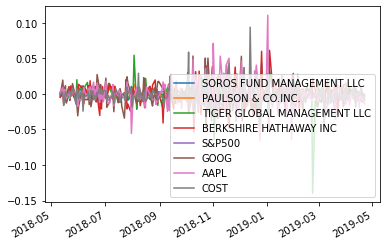

In [33]:
# Plot returns for visual
combined_returns.plot()